In [11]:
%matplotlib inline 

import os
import glob
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import datetime
import time


In [12]:
# generate dictionary

# path='/home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/clean/level_2/numpy/{}/*.npy' #level_2 (1d array for sum stats)
path='/home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_50m/clean/level_2/{}/*.npy' 

start = 2013; end = 2018
years = range(start, end+1)

flight_dict ={} #empty flight_dict
num_flights = [] #empty list

for year in years:
#     print((year))
    flight_dict[str(year)] = sorted(glob.glob(path.format(year))) #build flight_dicttionary, important to have flight_dict['str']
    
for key, value in flight_dict.items(): 

        num_flights.append(len(value))
        print('number of lidar flights in {}:'.format(key) , len(value))
print('# of flights list:', num_flights)
 
x=(sum([len(flight_dict[x]) for x in flight_dict])) #sum flight_dict[x] by adding the length for each x in flight_dict
print('# of flights total:', x) 

number of lidar flights in 2013: 6
number of lidar flights in 2014: 11
number of lidar flights in 2015: 10
number of lidar flights in 2016: 13
number of lidar flights in 2017: 9
number of lidar flights in 2018: 2
# of flights list: [6, 11, 10, 13, 9, 2]
# of flights total: 51


In [ ]:
#trying different methods to compute/store KDE's

f = '/home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/clean/level_2/numpy/2014/arr_20140407.npy'

a=np.load(f) #load data array (from the numpy dir)
kde=sp.stats.gaussian_kde(a[~np.isnan(a)])
print(type(kde))
print(kde.d)
k=sp.stats.gaussian_kde.pdf(kde[:])
print(k)
df_a = pd.DataFrame(data=a[~np.isnan(a)].flatten(), columns=['SD[m]']) #, dtype=np.float)
print(df_a[:10])
# print(kde.dataset[0])
df_k = pd.DataFrame(data=pdf(kde), columns=['kde']) #, dtype=np.float)
# print(type(df))
print(df_k[:10])
# df.plot(y='SD[m]')
# plt.show()
# print(kde.dataset.shape)
# plt.plot(kde.dataset[0],'r.')
# plt.show()

# df = pd.DataFrame(data=a.flatten(), columns=['SD[m]']) #, dtype=np.float)
# df=df.dropna()
# print(df.shape)
# # print(df[:100])

# kde_sp = stats.gaussian_kde(df.iloc[:3000])
# print(type(kde_sp))
# # ax = df.plot.kde()
# # for col in df: 
# #     kde=sns.kdeplot(df[col], shade=True) 
# #     print(type(kde))
    

2013
file: 2013-04-03
file: 2013-04-29
file: 2013-05-03
file: 2013-05-25
file: 2013-06-01
file: 2013-06-08
2014
file: 2014-03-23
file: 2014-04-07
file: 2014-04-13
file: 2014-04-20
file: 2014-04-28
file: 2014-05-02
file: 2014-05-11
file: 2014-05-17
file: 2014-05-27
file: 2014-05-31
file: 2014-06-05
2015
file: 2015-02-18
file: 2015-03-06
file: 2015-03-25
file: 2015-04-03
file: 2015-04-09
file: 2015-04-15
file: 2015-04-27
file: 2015-05-01
file: 2015-05-28
file: 2015-06-08
2016
file: 2016-03-26
file: 2016-04-01
file: 2016-04-07
file: 2016-04-16
file: 2016-04-26
file: 2016-05-09
file: 2016-05-27
file: 2016-06-07
file: 2016-06-13
file: 2016-06-20
file: 2016-06-25
file: 2016-07-01
file: 2016-07-08
2017
file: 2017-01-29
file: 2017-03-03
file: 2017-04-01
file: 2017-05-02
file: 2017-06-04
file: 2017-07-09
file: 2017-07-17
file: 2017-07-27
file: 2017-08-16
2018
file: 2018-04-23
file: 2018-05-28


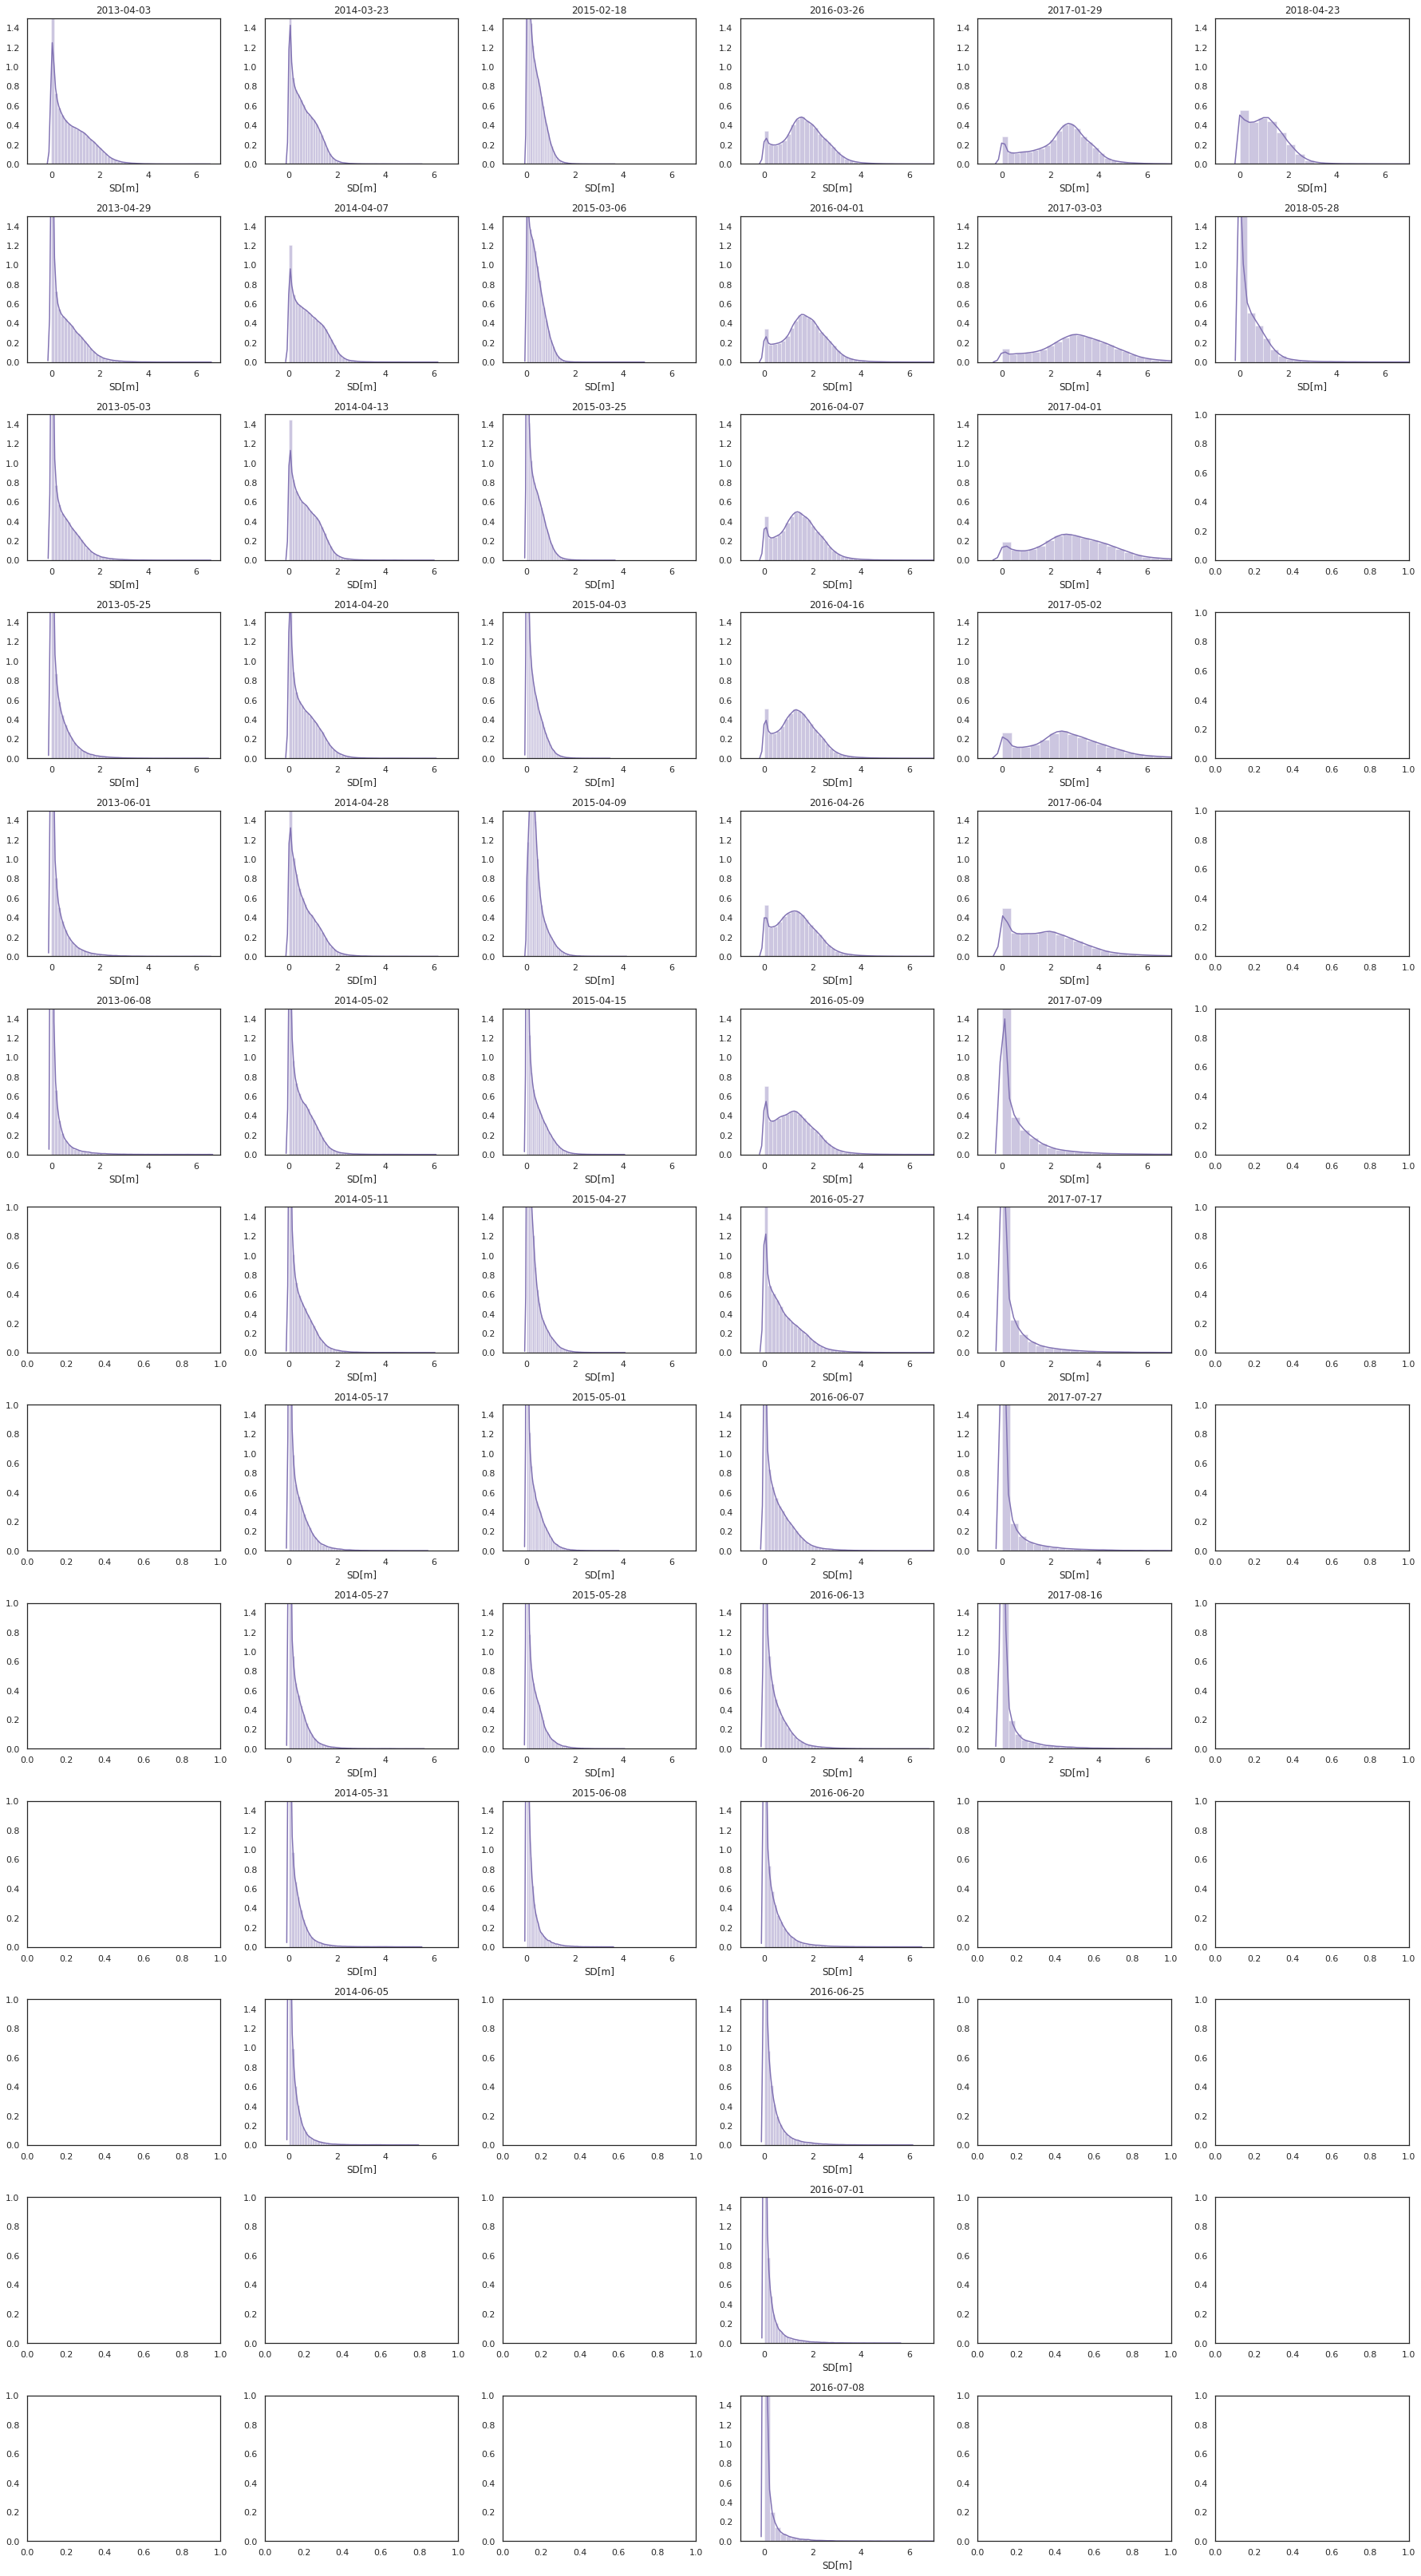

runtime = 0.8774676561355591


In [14]:
# numpy to dataframe
#and plot it

#GOOOD - just takes forever since it computes kde on the fly
t=time.time()

fig, axs=plt.subplots(nrows=max(num_flights),ncols=len(years), figsize = (25, 45)) #print(axs.shape)
sns.set(style="white", palette="deep", color_codes=True)


for i, year in enumerate(years): #loops each year
    print(year)
    flist = glob.glob(path.format(year))
    
    for j,f in enumerate(sorted(flist)):
#         print(f)
        
        #title info (i.e date)
        dt_str = f.split("/")[-1] #splits on / and saves the last one
        dt_str = "".join([c for c in dt_str if c.isnumeric()]) #grabs numeric values
        dt = pd.to_datetime(dt_str) #convert to datetime
        print('file:',dt.date())

        #data
        a=np.load(f) #load data array (from the numpy dir)
        df = pd.DataFrame(data=a.flatten(), columns=['SD[m]']) #, dtype=np.float)
        df=df.dropna()
#         for col in df: 
#             kde=sns.kdeplot(df[col[:100]], shade=True , ax=axs[j,i], legend=False)
#             sns.xlim(0,10)

        # plot
#         kde=sns.kdeplot(df['SD[m]'], gridsize=100, shade=True ,color='g', ax=axs[j,i], legend=False) #df['SD[m]'][:100]
        dist=sns.distplot(df['SD[m]'], bins=50, hist=True, color='m', ax=axs[j,i], axlabel=None)
        axs[j,i].set_xlim([-1,7])
        axs[j,i].set_ylim([0,1.5])
        axs[j,i].set_title(dt.date())
            

plt.tight_layout()
fig.savefig('/home/meganmason/Documents/projects/thesis/analysis/scripts/figs/hist_columns_50m.png', dpi=300, orientation='portrait')
plt.show()

tt=time.time()
print('runtime =', (tt-t)/60)

In [ ]:
# peak kde

path = '/home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/peak_sd/clean'
flist = sorted(glob.glob(os.path.join(path, '*.tif'))

fig, axs=plt.subplots(figsize = (30, 20)) #print(axs.shape)
sns.set(style="white", palette="deep", color_codes=True)


               
for i, f in enumerate(flist):
    print(f)
    #title info (i.e date)
    dt_str = f.split("/")[-1] #splits on / and saves the last one
    dt_str = "".join([c for c in dt_str if c.isnumeric()]) #grabs numeric values
    dt = pd.to_datetime(dt_str) #convert to datetime
    print('file:',dt.date())

    #data
    a=np.load(f) #load data array (from the numpy dir)
    df = pd.DataFrame(data=a.flatten(), columns=['SD[m]']) #, dtype=np.float)
    df=df.dropna()

    # plot
    kde=sns.kdeplot(df['SD[m]'], gridsize=100, shade=True , ax=axs, legend=axs[i].set_title(dt.date())) #df['SD[m]'][:100]
    axs.set_xlim([0,10])
    
    
    